此檔案使用scikit-learn 機器學習套件裡的linear regression演算法，來達成波士頓房地產價錢預測

In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

引入函式庫及內建波士頓房地產資料
引入函式庫如下:
sklearn.datasets: 用來匯入內建之波士頓房地產資料庫
sklearn.cross_val_predict: 使用交叉驗證用來評估辨識準確度
sklearn.linear_model: 線性分析之模組
matplotlib.pyplot: 用來繪製影像

將線性迴歸分析演算法引入到lr
將波士頓房地產資料匯入到boston
將波士頓房地產資料的預測數值(target)匯入到y

In [2]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

訓練預測機
lr為使用的預測機(線性回歸分析)，boston.data為波士頓房地產數據， y為回歸目標， cv為交叉驗証時資料切分的依據，範例為10，則將資料切分為10等分，以其中9等分為訓練集，另外一等分則為測試集。

In [7]:
from sklearn.externals import joblib

joblib.dump(lr,"./lr_machine.pkl")

['./lr_machine.pkl']

使用joblib.dump將線性回歸預測器匯出為pkl檔

In [15]:
lr=joblib.load("./lr_machine.pkl")
lr.fit(boston.data, y)
predict_y=lr.predict(boston.data[2])

C:\Users\jean\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


使用joblib.load將pkl檔匯入為預測機lr
接著使用波士頓房地產數據(boston.data)，以及預測目標(y)來訓練預測機lr
predict_y為將房地產數據的第三項匯入預測機所得到的預測結果

C:\Users\jean\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


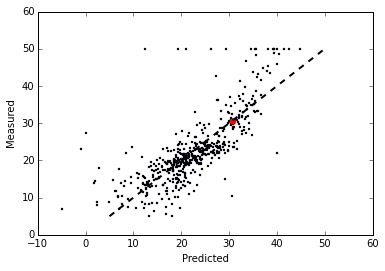

In [19]:
plt.scatter(predicted,y,s=2)
plt.plot(predict_y, predict_y, 'ro')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Measured')